# L2.2 Diffusion of Innovations

The Bass Model developed by Frank Bass (1969) describes the process of diffusion of innovations. It is a classical mathematical model in marketing literature.

Consider that $A(t)$ denotes the total population that adopted an innovation until time $t$- The total of potential adopters is denoted as $P$. According to this model, the adoption rate at which the number of adopters changes throughout time depends on how innovative is the product being adopted.

$$
\frac{dA(t)}{dt} = i(t) [P-A(t)]
$$

where $i(t)$ denotes the coefficient of diffusion, which describes the innovativeness of the product being adopted. There are various methods of defining the diffusion coefficient. In particular, the following three models for computing $i(t)$ are going to be considered:
* External-Influence Model
$$
i(t) = \alpha
$$

* Internal-Influence Model
$$
i(t) = \beta A(t)
$$

* Mixed-Influence Model
$$
i(t) = \alpha + \beta A(t)
$$
where $\alpha$ is the external-influence factor and $\beta$ is the internal-influence factor or imitation factor.

## 1. Solving Ordinary Differential Equations

An equation which contains the derivate(s) of a yet to be determined function $y(x)$ is called an ordinary differential equation (ODE).

The SciPy Library [[1](https://docs.scipy.org/doc/scipy/reference/integrate.html)] includes different methods to solves ODE's in python: ```ode``` and ```odeint```.

## 1.1 Newton's Law of Cooling

The Newton's Law of Cooling states that the rate of change of temperature T is proportional to temperature difference with the enviroment ($T_{amb}$). An extensive description of this phenomena can be found here [[2](https://www.khanacademy.org/math/differential-equations/first-order-differential-equations/exponential-models-diff-eq/v/newtons-law-of-cooling)].
$$
\frac{dT}{dt} = - k (T-T_{amb})
$$

where k is the cooling coefficient.
The ```odeint``` method can be used this ODE. ```odeint``` requires three inputs:
```python
scipy.integrate.odeint(func, y0, t)
                       
```
* func: Function that return derivative values at y and t.
* y0: Initial conditions on y.
* t: A sequence of time points for which to solve for y.

Consider a cup of coffee at 95 $^\circ$C in a room where the temperature is 20 $^\circ$C. If the cooling coefficient is $k = 1/50$ min$^{-1}$.

In [83]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [84]:
def fun(T, t, k, Tamb):
    dTdt = - k * (T - Tamb)
    return dTdt

In [85]:
T0 = 95
k = 1/50
Tamb = 20
t = np.linspace(0,60)

In [86]:
T = odeint(fun, T0, t, args = (k, Tamb))

The analytical solution of the problem can be obtained by direct integration:
$$
T(t) = (T(0) - T_{amb}) e^{-kt} + T_{amb}
$$

In [87]:
def yAnalytical(T0, Tamb, k, t):
    return (T0-Tamb)*np.exp(-k*t)+Tamb

The numerical and the analytical solution are presented in the following plot.

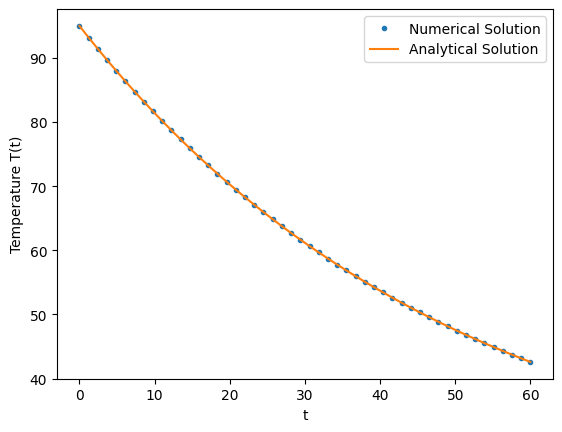

In [88]:
plt.plot(t, T, '.', label = 'Numerical Solution')
plt.plot(t, yAnalytical(T0, Tamb, k, t), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('Temperature T(t)')
plt.show()

## 1.2 External-Influence Model

In the external-influence model, the adoption coefficeint only depends on an external factor. One example of external influence in social media is when important news goes viral.

The external-influence model can be formulated as,
$$
\frac{dA(t)}{dt} = \alpha[P-A(t)]
$$

The analytical solution when A(0) = 0 is:
$$
A(t) = P(1-e^{-\alpha t})
$$

Considering a population P = 100 and $\alpha$ = 0.01, the cumulative population over the time can be obtained as follows (numerical and analytical solution).

In [89]:
def fun(A, t, alpha, P):
    dAdt = alpha * (P - A)
    return dAdt

In [90]:
P = 100
A0 = 0
alpha = 0.01
t = np.linspace(0,300)

In [91]:
A = odeint(fun, A0, t, args = (alpha, P))

In [92]:
def externalInfluence(alpha, P, t):
    return P*(1-np.exp(-alpha*t))

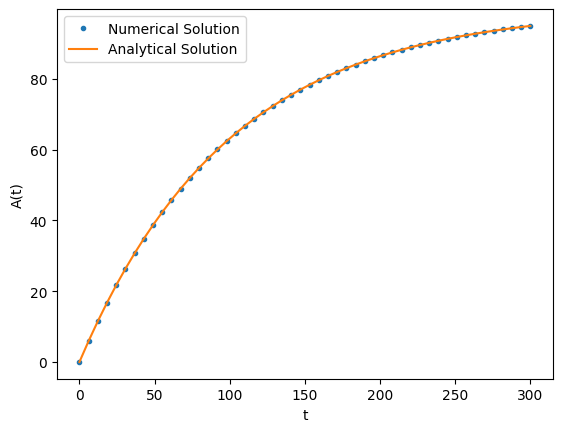

In [93]:
plt.plot(t, A, '.', label = 'Numerical Solution')
plt.plot(t, externalInfluence(alpha, P, t), '-', label = 'Analytical Solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('A(t)')
plt.savefig('ExternalInfluenceModel.png')
plt.show()

## Internal-Influence Model

In the internal-influence model, adoption depends on how many have adopted the innovation in the current time step. The internal model can be described as follows:
$$
\frac{dA(t)}{dt} = \beta A(t) [P - A(t)]
$$
This model is called a pure imitation model because the diffusion rate depends only on $\beta A(t)$.

The analytical solution of the model is:
$$
A(t) = \frac{P}{1+\frac{P-A_0}{A_0}e^{-\beta P(t-t0)}}
$$
where $A(t_0) = A_0$,

Considering a population P = 200, $\beta = 10^{-5}$ and $A_0 = 30$, the cumulative population over the time can be obtained as follows (numerical and analytical solution).

In [94]:
P = 200
beta = 1e-5
A0 = 30

# Time vector
t = np.linspace(0, 10000, 10000)

# Analytical solution
def analytical_solution(t, P, beta, A0):
    return P / (1 + (P / A0) * np.exp(-beta * P * t))

# Numerical solution using odeint
def internal_influence_model(A, t, P, beta):
  return beta * A * (P - A)

# Initial condition for the ODE solver
A_initial = A0

# Solve the ODE
A_numerical = odeint(internal_influence_model, A_initial, t, args=(P, beta)).flatten()

# Compute analytical solution
A_analytical = analytical_solution(t, P, beta, A0)

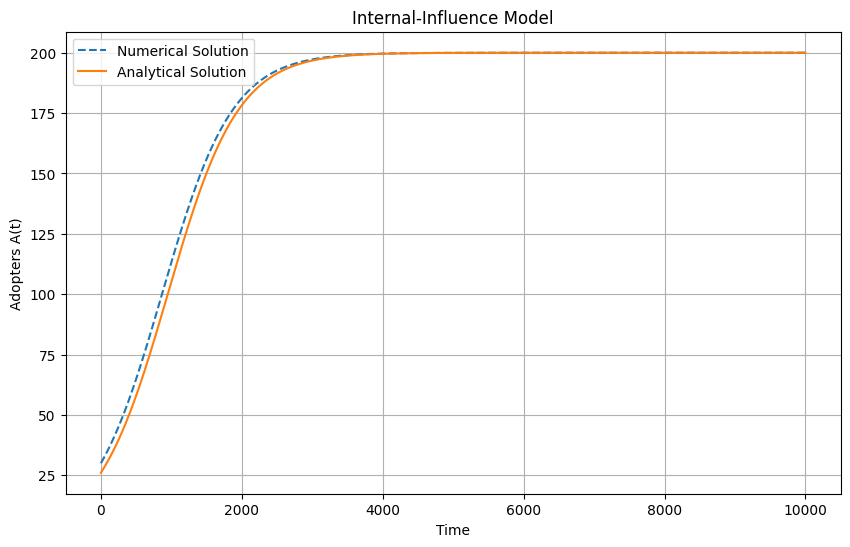

In [95]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, A_numerical, label='Numerical Solution', linestyle='dashed')
plt.plot(t, A_analytical, label='Analytical Solution')
plt.xlabel('Time')
plt.ylabel('Adopters A(t)')
plt.title('Internal-Influence Model')
plt.legend()
plt.grid(True)
plt.show()

## Mixed-Influence Model

The mixed-influence model is situated in between the internal- and external-influece models. The mixed-influence model can be described as follows:
$$
\frac{dA(t)}{dt} = (\alpha + \beta A(t)) [P - A(t)]
$$
This model is called a pure imitation model because the diffusion rate depends only on $\beta A(t)$.

The analytical solution of the model is:
$$
A(t) = \frac{P - \frac{\alpha(P-A_0)}{\alpha + \beta A_0} e^{-(\alpha + \beta P)(t-t_0)}}{1 + \frac{\beta(P-A_0)}{\alpha + \beta A_0} e^{-(\alpha + \beta P)(t-t_0)}}
$$
where $A(t_0) = A_0$,

Considering a population P = 200, $alpha = 10^-{-3}$, $\beta = 10^{-5}$ and $A_0 = 30$, the cumulative population over the time can be obtained as follows (numerical and analytical solution).

In [96]:
alpha = 1e-3

# Analytical solution
def analytical_solution(t, P, alpha, beta, A0):
    term1 = (alpha * (P - A0) / (alpha + beta * A0)) * np.exp(-(alpha + beta * P) * t)
    term2 = (beta * (P - A0) / (alpha + beta * A0)) * np.exp(-(alpha + beta * P) * t)
    return P - term1 / (1 + term2)

# Numerical solution using odeint
def mixed_influence_model(A, t, P, alpha, beta):
    return (alpha + beta * A) * (P - A)

# Initial condition for the ODE solver
A_initial = A0

# Solve the ODE
A_numerical = odeint(mixed_influence_model, A_initial, t, args=(P, alpha, beta)).flatten()

# Compute analytical solution
A_analytical = analytical_solution(t, P, alpha, beta, A0)


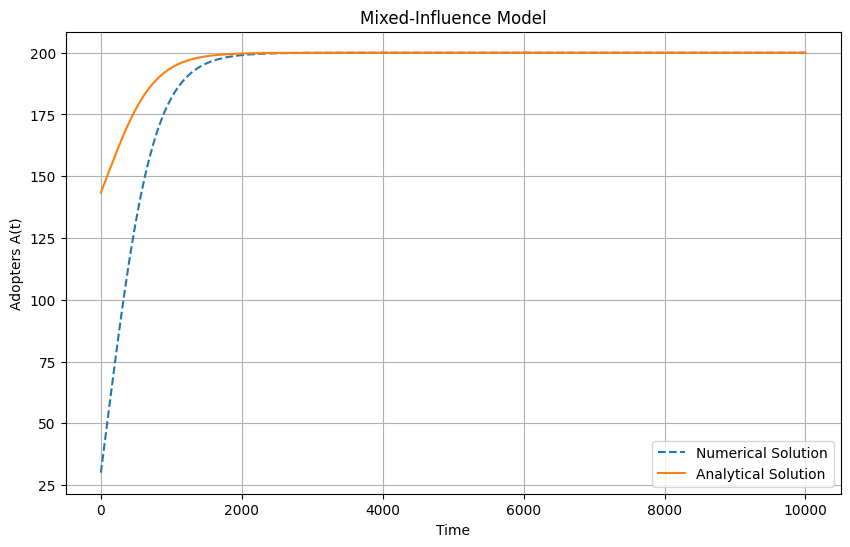

In [97]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, A_numerical, label='Numerical Solution', linestyle='dashed')
plt.plot(t, A_analytical, label='Analytical Solution')
plt.xlabel('Time')
plt.ylabel('Adopters A(t)')
plt.title('Mixed-Influence Model')
plt.legend()
plt.grid(True)
plt.show()

# Product Market Forecasting

Reproduce this Product Market Forecasting using Bass Model: https://srdas.github.io/MLBook/productForecastingBassModel.html with Python. Explain clearly each step. Datasets can be found here: https://app.box.com/s/8uduwzfyezeoupqii76u7a6ro3somole obtained from https://srdas.github.io/MLBook2/.

# **Product Market Forecasting using the Bass Model**

## 15.1 Main Ideas

The Bass product diffusion model is a classic one in the marketing literature. It has been successfully used to predict the market shares of various newly introduced products, as well as mature ones.

The main idea of the model is that the adoption rate of a product comes from two sources:

1.   The propensity of consumers to adopt the product independent of social influences to do so.
2.   The additional propensity to adopt the product because others have adopted it. Hence, at some point in the life cycle of a good product, social contagion, i.e. the influence of the early adopters becomes sufficiently strong so as to drive many others to adopt the product as well. It may be going too far to think of this as a network effect, because Frank Bass did this work well before the concept of network effect was introduced, but essentially that is what it is.

The Bass model shows how the information of the first few periods of sales data may be used to develop a fairly good forecast of future sales. One can easily see that whereas this model came from the domain of marketing, it may just as easily be used to model forecasts of cashflows to determine the value of a start-up company.

## 15.2 Historical Examples

There are some classic examples from the literature of the Bass model providing a very good forecast of the ramp up in product adoption as a function of the two sources described above. See for example the actual versus predicted market growth for VCRs in the 80s and the adoption of answering machines shown in the Figures below.

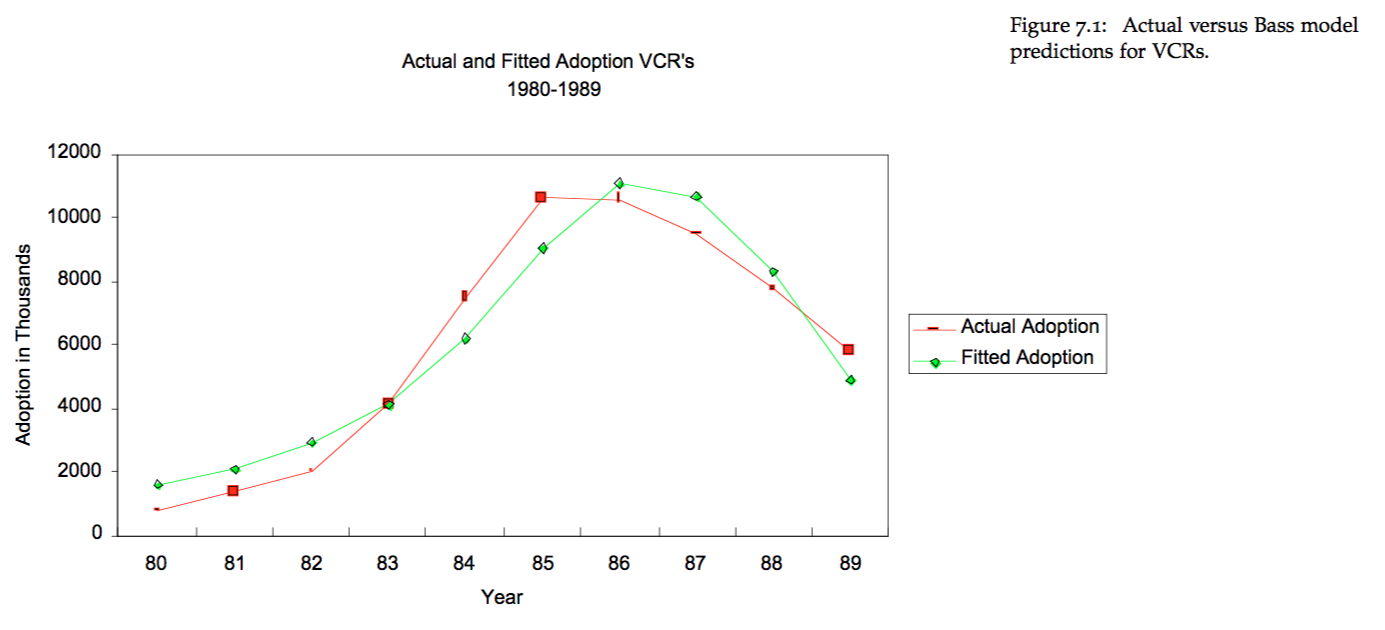

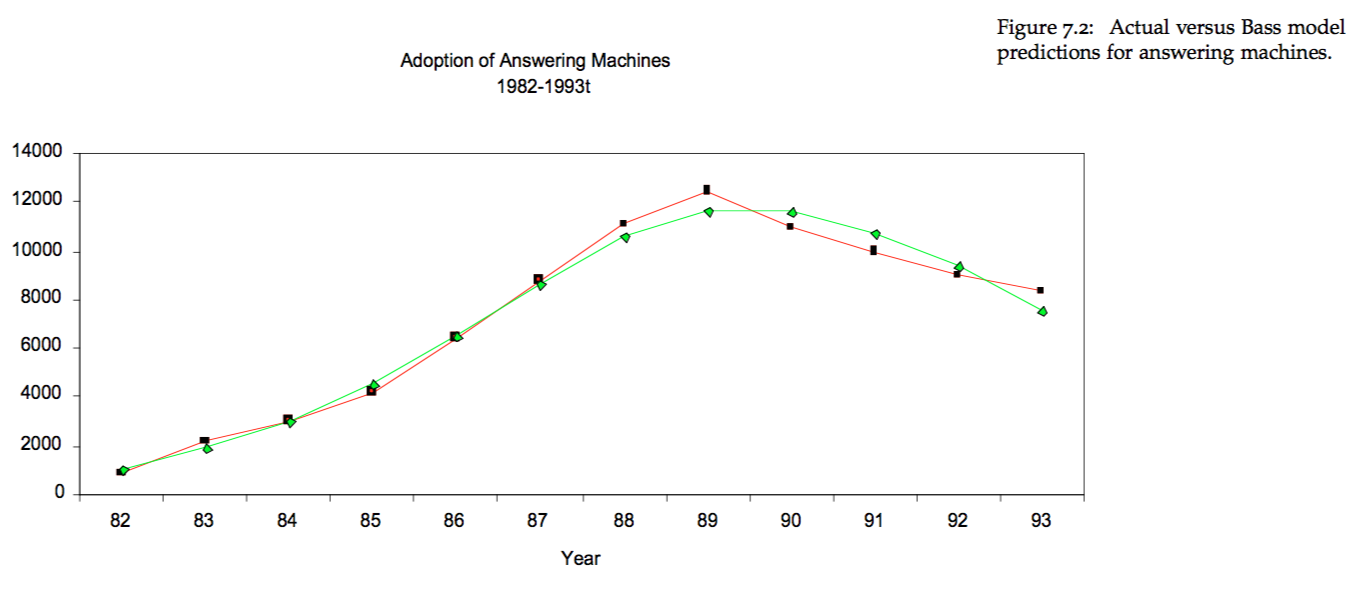

## 15.3 The Basic Idea




We follow the exposition in Bass (1969).

Define the cumulative probability of purchase of a product from time zero to time  t
  by a single individual as  F(t)
 . Then, the probability of purchase at time  t
  is the density function  f(t)=F′(t)
 .

The rate of purchase at time  t
 , given no purchase so far, logically follows, i.e.

 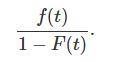

 Modeling this is just like modeling the adoption rate of the product at a given time  t
 .

## 15.4 Main Differencial Equation
Bass suggested that this adoption rate be defined as

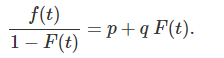

where we may think of  p
  as defining the independent rate of a consumer adopting the product, and  q
  as the imitation rate, because it modulates the impact from the cumulative intensity of adoption,  F(t)
 .

Hence, if we can find  p
  and  q
  for a product, we can forecast its adoption over time, and thereby generate a time path of sales. To summarize:



*   p: coefficient of innovation.
*   q: coefficient of imitation.



## 15.5 Solving the Model for F(t)

We rewrite the Bass equation:

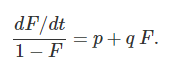

and note that  F(0)=0.

 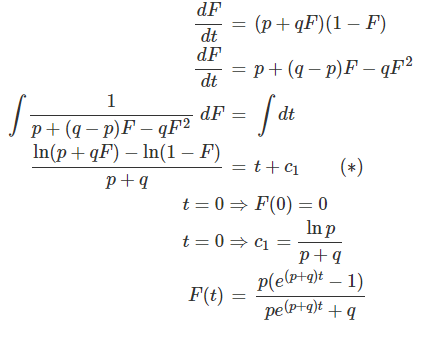


## 15.6 Another Solution

An alternative approach (this was suggested by students Muhammad Sagarwalla based on ideas from Alexey Orlovsky) goes as follows. First, split the integral above into partial fractions.

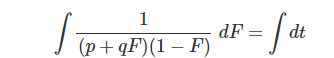

So we write

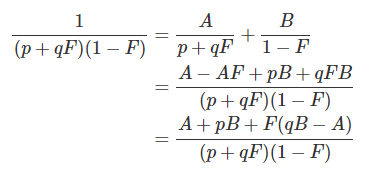

This implies that

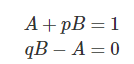

Solving we get

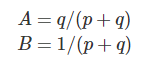

So that

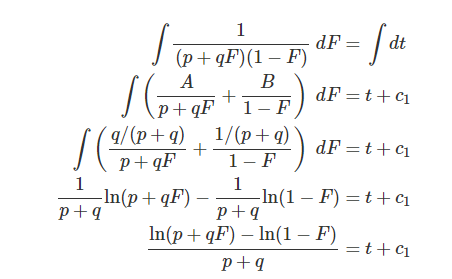

which is the same as equation (*). The solution as before is

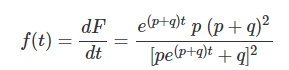

Therefore, if the target market is of size  m, then at each  t, the adoptions are simply given by  m×f(t).

In [98]:
import numpy as np
import matplotlib.pyplot as plt

## 15.8 Example

For example, set  m=100,000, p=0.01 and  q=0.2. Then the adoption rate is shown in the Figure below.

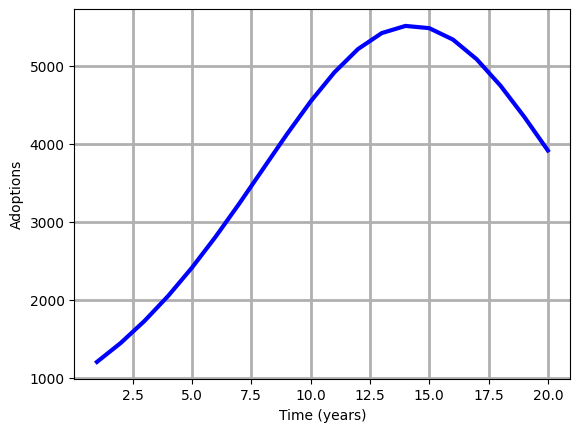

In [99]:
def f(p, q, t):
  return (np.exp((p+q)*t)*p*(p+q)**2) / (p*np.exp((p+q)*t)+q)**2

# Parameters
t = np.arange(1, 21)
m = 100000
p = 0.01
q = 0.20

# Compute the Bass model values
adoptions = m * f(p, q, t)

# Plotting
plt.plot(t, adoptions, color="blue", linewidth=3)
plt.xlabel("Time (years)")
plt.ylabel("Adoptions")
plt.grid(linewidth=2)
plt.show()

## 15.9 Symbolic Math in Python

In [100]:
import sympy as sp

p*(exp(t*(p + q)) - 1)/(p*exp(t*(p + q)) + q)
-p**2*(p + q)*(exp(t*(p + q)) - 1)*exp(t*(p + q))/(p*exp(t*(p + q)) + q)**2 + p*(p + q)*exp(t*(p + q))/(p*exp(t*(p + q)) + q)


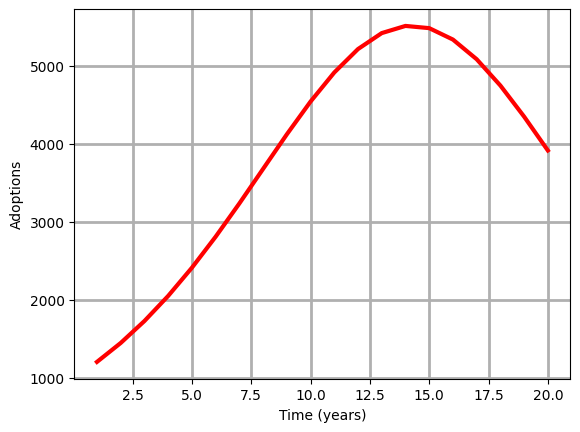

In [101]:
# Define the symbols
p, q, t = sp.symbols('p q t')

# Define the Bass model expression
FF = p * (sp.exp((p + q) * t) - 1) / (p * sp.exp((p + q) * t) + q)
print(FF)

# Take the derivative of the expression with respect to t
ff = sp.diff(FF, t)
print(ff)

# Define the function to evaluate the derivative
def evaluate_derivative(p_value, q_value, t_values):
    p_sub = p_value
    q_sub = q_value
    ff_lambdified = sp.lambdify(t, ff.subs({p: p_sub, q: q_sub}), 'numpy')
    return ff_lambdified(t_values)

# Parameters
m = 100000
p_value = 0.01
q_value = 0.20
t_values = np.arange(1, 21)

# Compute the adoptions using the derivative of the Bass model
adoptions = m * evaluate_derivative(p_value, q_value, t_values)

# Plotting
plt.plot(t_values, adoptions, color="red", linewidth=3)
plt.xlabel("Time (years)")
plt.ylabel("Adoptions")
plt.grid(linewidth=2)
plt.show()

## 15.11 Calibration

How do we get coefficients p and q? Given we have the current sales history of the product, we can use it to fit the adoption curve.

1.   Sales in any period are:  s(t)=mf(t).
2.   Cumulative sales up to time t are:  S(t)=mF(t).

Substituting for f(t) and  F(t) in the Bass equation gives:

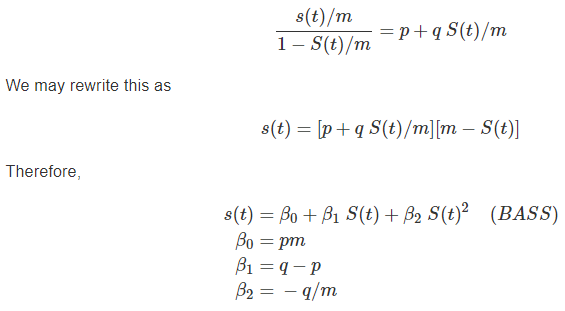

Equation (BASS) may be estimated by a regression of sales against cumulative sales. Once the coefficients in the regression  {β0,β1,β2} are obtained, the equations above may be inverted to determine the values o {m,p,q}. We note that since

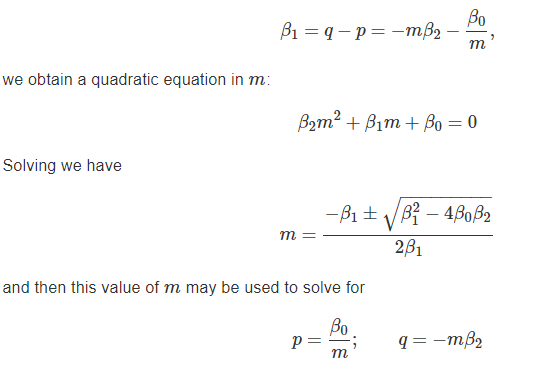

## 15.12 Iphone Sales Forecast

As an example, let’s look at the trend for iPhone sales (we store the quarterly sales in a file and read it in, and then undertake the Bass model analysis). We get the data from: http://www.statista.com/statistics/263401/global-apple-iphone-sales-since-3rd-quarter-2007/

In [102]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [103]:
# Read the data
data = pd.read_csv("iphone_sales.txt", delim_whitespace=True)
print(data.head())
print(data.tail())

  Quarter  Sales_MM_units
0   Q3_07            0.27
1   Q4_07            1.12
2   Q1_08            2.32
3   Q2_08            1.70
4   Q3_08            0.72
   Quarter  Sales_MM_units
30   Q1_15           74.47
31   Q2_15           61.17
32   Q3_15           47.53
33   Q4_15           48.05
34   Q1_16           74.78


In [104]:
# Extract the sales data
isales = data['Sales_MM_units'].values
cum_isales = np.cumsum(isales)
cum_isales2 = cum_isales**2

In [105]:
# Fit the polynomial regression model
X = np.vstack([cum_isales, cum_isales2]).T
model = LinearRegression().fit(X, isales)
print(model.coef_, model.intercept_)

[ 1.12993700e-01 -5.50754865e-05] 3.696306920748757


In [106]:
# Summary statistics
print(f'R^2: {model.score(X, isales)}')

R^2: 0.8729472746033898


In [107]:
# Coefficients
b = [model.intercept_] + list(model.coef_)

# Calculate m1 and m2
m1 = (-b[1] + np.sqrt(b[1]**2 - 4*b[0]*b[2])) / (2*b[2])
m2 = (-b[1] - np.sqrt(b[1]**2 - 4*b[0]*b[2])) / (2*b[2])
print(m1, m2)

-32.20691009876421 2083.82201749385


In [108]:
# Calculate m, p, and q
m = max(m1, m2)
print(m)
p = b[0] / m
q = -m * b[2]
print(f'p = {p}, q = {q}')

2083.82201749385
p = 0.0017738112418997252, q = 0.1147675113636741


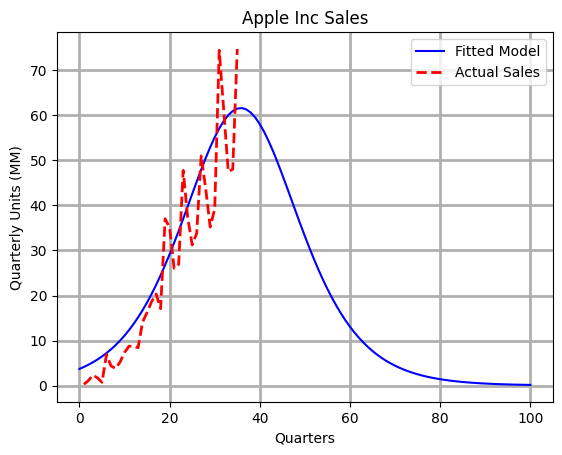

In [109]:
# Plot the fitted model
nqtrs = 100
t_values = np.arange(nqtrs + 1)

# Define the Bass model expression
FF = p * (sp.exp((p + q) * t) - 1) / (p * sp.exp((p + q) * t) + q)
ff = sp.diff(FF, t)

# Evaluate the derivative function
ff_lambdified = sp.lambdify(t, ff.subs({p: p, q: q}), 'numpy')
fn_f = ff_lambdified(t_values) * m

plt.plot(t_values, fn_f, label='Fitted Model', color="blue")
plt.plot(np.arange(1, len(isales) + 1), isales, 'r--', linewidth=2, label='Actual Sales')
plt.xlabel("Quarters")
plt.ylabel("Quarterly Units (MM)")
plt.title("Apple Inc Sales")
plt.legend()
plt.grid(linewidth=2)
plt.show()

## 14.13 Comparison to other products
The estimated Apple coefficients are: p=0.0018 and  q=0.1148. For several other products, the table below shows the estimated coefficients reported in Table I of the original Bass (1969) paper.

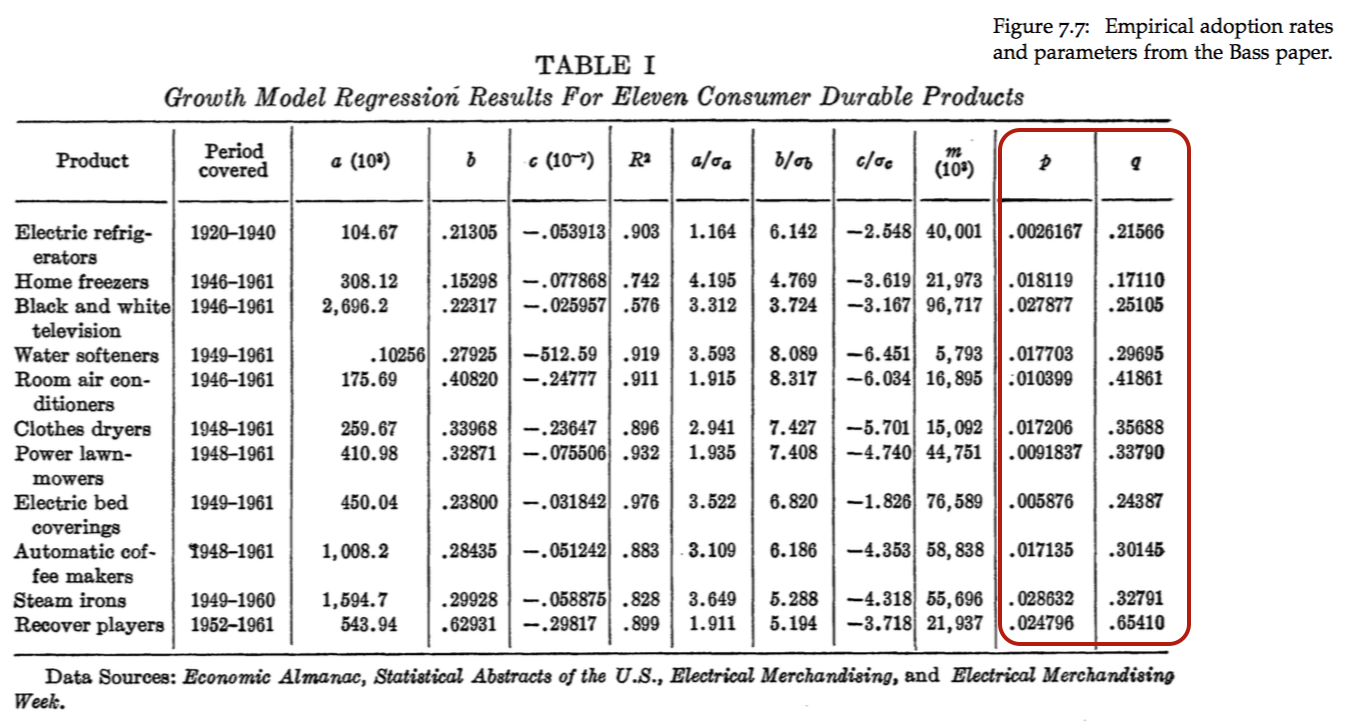

## 15.14 Sales Peak

It is easy to calculate the time at which adoptions will peak out. Differentiate  f(t) with respect to  t, and set the result equal to zero, i.e.

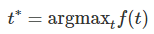

which is equivalent to the solution to  f′(t)=0.

The calculations are simple and give

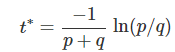

Hence, for the values p=0.01 and q=0.2, we have

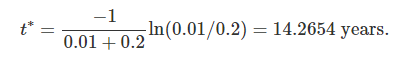

If we examine the plot in the earlier Figure in the symbolic math section we see this to be where the graph peaks out.

For the Apple data, here is the computation of the sales peak, reported in number of quarters from inception.

In [110]:
# Calculate the peak sales time point (tstar)
tstar = -1 / (p + q) * np.log(p / q)
print(f"Peak sales time point (in quarters): {tstar}")

Peak sales time point (in quarters): 35.77939457746784


## 15.15 Samsung Galaxy Phone Sales

In [111]:
# Read the data
data = pd.read_csv("galaxy_sales.csv")
print(data.head())

# Extract the sales data
isales = data.iloc[:, 1].values
cum_isales = np.cumsum(isales)
cum_isales2 = cum_isales**2

# Fit the polynomial regression model
X = np.vstack([cum_isales, cum_isales2]).T
model = LinearRegression().fit(X, isales)
print("Coefficients:", model.coef_, "Intercept:", model.intercept_)

# Summary statistics
print(f'R^2: {model.score(X, isales)}')

  Quarter  sales
0  Q1 '10  64.90
1  Q2 '10  65.33
2  Q3 '10  71.67
3  Q4 '10  79.17
4  Q1 '11  68.78
Coefficients: [ 7.65999387e-02 -2.80580768e-05] Intercept: 53.74838721807256
R^2: 0.8205677792526455


In [112]:
# Coefficients
b = [model.intercept_] + list(model.coef_)

# Calculate m1 and m2
m1 = (-b[1] + np.sqrt(b[1]**2 - 4*b[0]*b[2])) / (2*b[2])
m2 = (-b[1] - np.sqrt(b[1]**2 - 4*b[0]*b[2])) / (2*b[2])
print(m1, m2)

-578.9157107291992 3308.965218219113


In [113]:
# Calculate m, p, and q
m = max(m1, m2)
print("m:", m)
p = b[0] / m
q = -m * b[2]
print(f'p = {p}, q = {q}')

m: 3308.965218219113
p = 0.016243261464984504, q = 0.0928432001791269


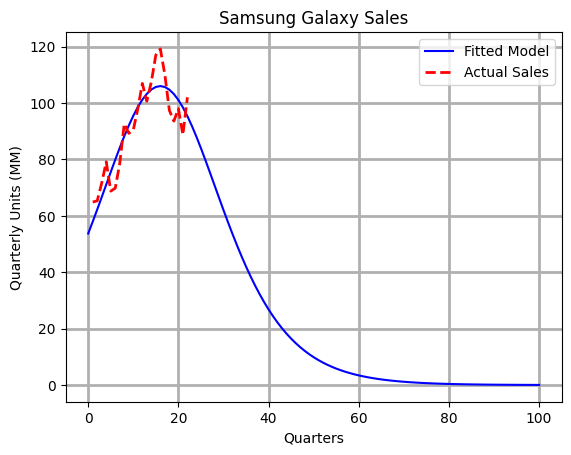

In [114]:
# Plot the fitted model
nqtrs = 100
t_values = np.arange(nqtrs + 1)

# Define the Bass model expression
FF = p * (sp.exp((p + q) * t) - 1) / (p * sp.exp((p + q) * t) + q)
ff = sp.diff(FF, t)

# Evaluate the derivative function
ff_lambdified = sp.lambdify(t, ff.subs({p: p, q: q}), 'numpy')
fn_f = ff_lambdified(t_values) * m

plt.plot(t_values, fn_f, label='Fitted Model', color="blue")
plt.plot(np.arange(1, len(isales) + 1), isales, 'r--', linewidth=2, label='Actual Sales')
plt.xlabel("Quarters")
plt.ylabel("Quarterly Units (MM)")
plt.title("Samsung Galaxy Sales")
plt.legend()
plt.grid(linewidth=2)
plt.show()

## 15.16 Global Semiconductor Sales

### Note: Since the dataset was not in the datasets repository, the results of the prediction obtained in the reference material was used, so the result is a straight line and shows no variation.

In [115]:
# Read the data
data = pd.read_csv("semiconductor_sales.csv")
print(data.head())

# Extract the sales data
isales = data.iloc[:, 1].values
cum_isales = np.cumsum(isales)
cum_isales2 = cum_isales**2

# Fit the polynomial regression model
X = np.vstack([cum_isales, cum_isales2]).T
y = isales

model = LinearRegression().fit(X, y)
print("Coefficients:", model.coef_, "Intercept:", model.intercept_)

# Summary statistics
r_squared = model.score(X, isales)
print(f'R^2: {r_squared}')

   t    V2       fn_f
0  0  1988  50.858804
1  1  1989  55.630291
2  2  1990  60.802858
3  3  1991  66.400785
4  4  1992  72.447856
Coefficients: [ 5.02765212e-04 -5.90190518e-11] Intercept: 1987.0066165589672
R^2: 0.9999999935518721


In [116]:
# Coefficients
b = [model.intercept_] + list(model.coef_)

# Calculate m1 and m2
m1 = (-b[1] + np.sqrt(b[1]**2 - 4*b[0]*b[2])) / (2*b[2])
m2 = (-b[1] - np.sqrt(b[1]**2 - 4*b[0]*b[2])) / (2*b[2])
print("m1:", m1, "m2:", m2)

m1: -2938516.925443699 m2: 11457210.40714258


In [117]:
# Calculate m, p, and q
m = max(m1, m2)
print("m:", m)
p = b[0] / m
q = -m * b[2]
print(f'p = {p}, q = {q}')

m: 11457210.40714258
p = 0.00017342848267150966, q = 0.0006761936946335406


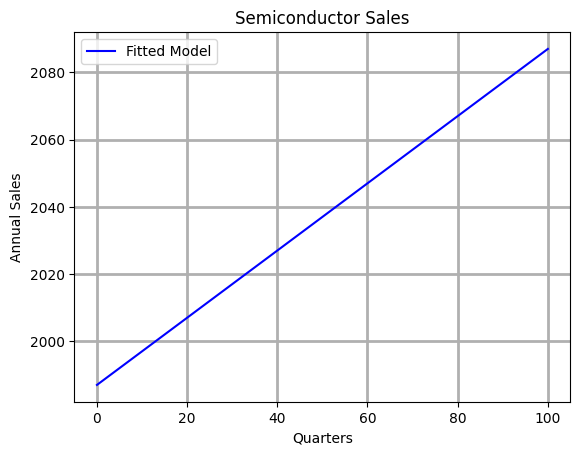

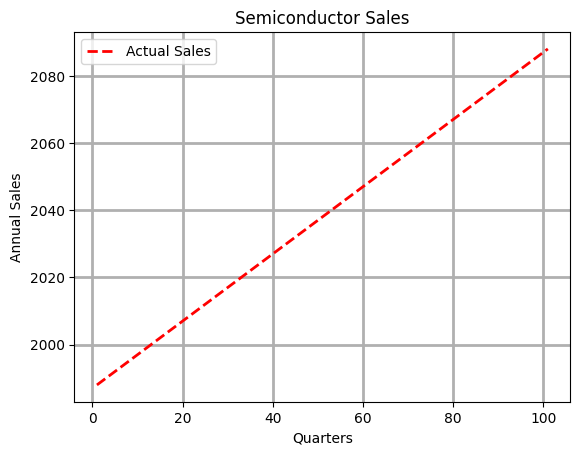

In [118]:
# Plot the fitted model
nqtrs = 100
t_values = np.arange(nqtrs + 1)

# Define the Bass model expression
t = sp.symbols('t')
FF = p * (sp.exp((p + q) * t) - 1) / (p * sp.exp((p + q) * t) + q)
ff = sp.diff(FF, t)

# Evaluate the derivative function
ff_lambdified = sp.lambdify(t, ff.subs({p: p, q: q}), 'numpy')
fn_f = ff_lambdified(t_values) * m

# Plotting the fitted model
plt.plot(t_values, fn_f, label='Fitted Model', color="blue")
plt.xlabel("Quarters")
plt.ylabel("Annual Sales")
plt.title("Semiconductor Sales")
plt.legend()
plt.grid(linewidth=2)
plt.show()

# Plotting the sales data
plt.plot(np.arange(1, len(isales) + 1), isales, 'r--', linewidth=2, label='Actual Sales')
plt.xlabel("Quarters")
plt.ylabel("Annual Sales")
plt.title("Semiconductor Sales")
plt.legend()
plt.grid(linewidth=2)
plt.show()

In [119]:
# Showing data frame
nqtrs = 100
t_values = np.arange(nqtrs + 1)
years = 1988 + t_values

# Combine the data into a DataFrame
df = pd.DataFrame({
    't': t_values,
    'Year': years,
    'Fitted_Model': fn_f
})

# Print the DataFrame
print(df)

       t  Year  Fitted_Model
0      0  1988   1987.006617
1      1  1989   1988.005632
2      2  1990   1989.004684
3      3  1991   1990.003770
4      4  1992   1991.002890
..   ...   ...           ...
96    96  2084   2082.973801
97    97  2085   2083.972998
98    98  2086   2084.972162
99    99  2087   2085.971291
100  100  2088   2086.970385

[101 rows x 3 columns]


## 15.17 Extensions
The Bass model has been extended to what is known as the generalized Bass model in a paper by Bass, Krishnan, and Jain (1994). The idea is to extend the model to the following equation:

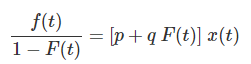

where  x(t)stands for current marketing effort. This additional variable allows (i) consideration of effort in the model, and (ii) given the function  x(t), it may be optimized.

The Bass model comes from a deterministic differential equation. Extensions to stochastic differential equations need to be considered.

## 15.18 Trading off *p* vs *q*

In the Bass model, if the coefficient of imitation increases relative to the coefficient of innovation, then which of the following is the most valid?

1.   the peak of the product life cycle occurs later.
2.   the peak of the product life cycle occurs sooner.
3.   there may be an increasing chance of two life-cycle peaks.
4.   the peak may occur sooner or later, depending on the coefficient of innovation.

Using peak time formula, substitute  x=q/p

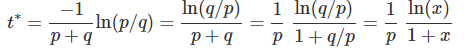

Differentiate with regard to x (we are interested in the sign of the first derivative  ∂t∗/∂q, which is the same as sign of  ∂t∗/∂x):

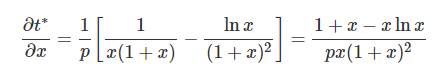


 From the Bass model we know that  q>p>0, i.e.  x>1, otherwise we could get negative values of acceptance or shape without maximum in the  0≤F<1area. Therefore, the sign of  ∂t∗/∂x is same as:

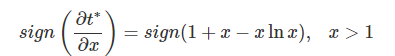

 But this non-linear equation

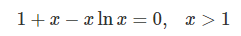

has a root  x≈3.59

In other words, the derivative  ∂t∗/∂x is negative when  x>3.59 and positive when  x<3.59. For low values of  x=q/p, an increase in the coefficient of imitation  q increases the time to sales peak, and for high values of  q/p the time decreases with increasing  q. So the right answer for the question appears to be “it depends on values of  p and q”.

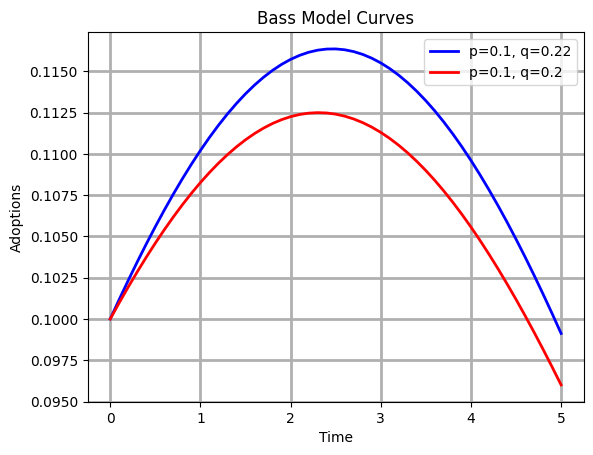

In [120]:
# Define the Bass model function
def f(p, q, t):
    return (np.exp((p + q) * t) * p * (p + q)**2) / (p * np.exp((p + q) * t) + q)**2

# Generate the time points
t = np.arange(0, 5.1, 0.1)

# Plot the first Bass model curve
p1, q1 = 0.1, 0.22
plt.plot(t, f(p1, q1, t), label=f'p={p1}, q={q1}', color="blue", linewidth=2)

# Plot the second Bass model curve
p2, q2 = 0.1, 0.20
plt.plot(t, f(p2, q2, t), label=f'p={p2}, q={q2}', color="red", linewidth=2)

# Add labels and legend
plt.xlabel("Time")
plt.ylabel("Adoptions")
plt.title("Bass Model Curves")
plt.legend()
plt.grid(linewidth=2)
plt.show()

## References

This notebook is based on:

[1]  Reza Zafarani, Mohammad Ali Abbasi, Huan Liu (2014) Social Media Mining: An Introduction. UK.